# ICD - AS8 - Projetos em Ciência de Dados   


### Questão 1:

Com relação a um projeto de Ciência de Dados, assinale a alternativa correta.

Escolha uma opção:

a.Se há dados faltantes, podemos usar o conjunto de teste para ajustá-los usando um modelo de regressão. <br>
b.A regressão não pode ser feita após a seleção dos conjuntos de treinamento e teste. <br>
<font color='red'>c.A separação dos conjuntos de teste e treinamento é feita após a limpeza dos dados. </font> <br>
d.O PCA é usado para a seleção dos atributos do classificador. <br>
e.A análise exploratória é feita antes da limpeza dos dados. <br>

### Questão 2:

Com relação a um projeto de Ciência de Dados, assinale a alternativa correta.

Escolha uma opção:

a.Os modelos Knn e random forest são usados apenas na classificação (não pode ser usado na regressão). <br>
b.Estatística descritiva pode ser usada para selecionar o conjunto de teste, onde os outliers são incluídos nos dados de treinamento. <br>
c.O formato atributo-valor não é necessário na regressão. <br>
<font color='red'>d.A validação cruzada é usada na seleção do modelo. </font><br>
e.O ajuste final do modelo deve usar o último fold obtido na validação cruzada. <br>

### Questão 3:

Assinale a sequência correta dos passos em um projeto de Ciência de Dados:

Escolha uma opção:

a.1 - Análise exploratória. 2- Limpeza. 3 – PCA. <br>
b.1 - Análise exploratória. 2 – PCA. 3 – Limpeza dos dados. <br>
<font color='red'>c.1 – Limpeza dos dados, 2 - Estatística descritiva, 3 - Aprendizado supervisionado. </font> <br>
d.1 - Avaliação do modelo. 2- Estatística descritiva. 3- Análise exploratória <br>
e.1 - Validação cruzada. 2 – Limpeza. 3 - Regressão. <br>

### Questão 4:   
Considere a base de dados da Vehicle.   
Usando o algoritmo random forest, qual é o atributo mais importante para a classificação?   
Considere o código abaixo para ler e preparar os dados.

Escolha uma opção:

<font color='red'> a.Max.L.Ra </font> <br>
b.D.Circ <br>
c.Max.L.Rect <br>
d.Scat.Ra <br>
e.Comp <br>

No código abaixo o professor faz a padronização do conjunto total de dados.  
Mas o correto é primeiro fazer a separação treino/teste e só depois fazer a padronização.

In [3]:
import random
random.seed(42) # define the seed (important to reproduce the results)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('data/Vehicle.csv', header=(0))

# remove NaN
data = data.dropna(axis='rows') #
# armazena o nome das classes
classes = np.array(pd.unique(data[data.columns[-1]]), dtype=str)  #name of the clases
features_names = data.columns

data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

 
from sklearn.model_selection import train_test_split
p = 0.2 # fracao de elementos no conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

In [6]:
data

array([[95, 48, 83, ..., 187, 197, 'van'],
       [91, 41, 84, ..., 189, 199, 'van'],
       [104, 50, 106, ..., 188, 196, 'saab'],
       ...,
       [106, 54, 101, ..., 187, 201, 'saab'],
       [86, 36, 78, ..., 190, 195, 'saab'],
       [85, 36, 66, ..., 186, 190, 'van']], dtype=object)

Olhando como número de árvores influencia o resultado do modelo RandomForestClassifier

Number of Estimators: 1 Accuracy: 0.7647058823529411
Number of Estimators: 6 Accuracy: 0.7764705882352941
Number of Estimators: 11 Accuracy: 0.8235294117647058
Number of Estimators: 16 Accuracy: 0.8235294117647058
Number of Estimators: 21 Accuracy: 0.8235294117647058
Number of Estimators: 26 Accuracy: 0.8352941176470589
Number of Estimators: 31 Accuracy: 0.8352941176470589
Number of Estimators: 36 Accuracy: 0.8470588235294118
Number of Estimators: 41 Accuracy: 0.8352941176470589
Number of Estimators: 46 Accuracy: 0.8352941176470589
Number of Estimators: 51 Accuracy: 0.8352941176470589
Number of Estimators: 56 Accuracy: 0.8352941176470589
Number of Estimators: 61 Accuracy: 0.8352941176470589
Number of Estimators: 66 Accuracy: 0.8352941176470589
Number of Estimators: 71 Accuracy: 0.8235294117647058
Number of Estimators: 76 Accuracy: 0.8235294117647058
Number of Estimators: 81 Accuracy: 0.8235294117647058
Number of Estimators: 86 Accuracy: 0.8235294117647058
Number of Estimators: 91 Accur

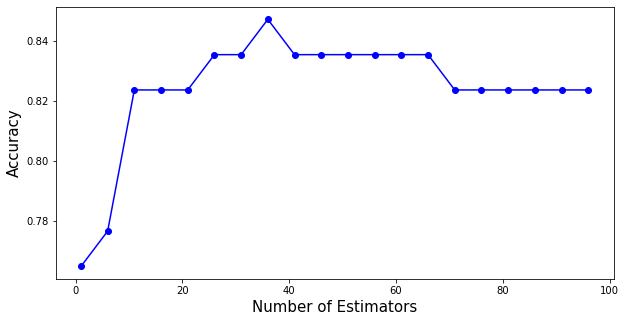

In [9]:
vscore = []
vn = []
for n in range(1,100,5):
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test) 
    score = accuracy_score(y_pred, y_test)
    print('Number of Estimators:', n, 'Accuracy:', score)
    vscore.append(score)
    vn.append(n)
best_n = vn[np.argmax(vscore)]
print('Melhor n:', best_n, ' com acurácia:', vscore[np.argmax(vscore)] )
plt.figure(figsize=(10,5))
plt.plot(vn, vscore, '-bo')
plt.xlabel('Number of Estimators', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.show()

Treinando o modelo com o melhor Number Estimators e fazendo as previsões

In [10]:
from sklearn.ensemble import RandomForestClassifier

# define os parâmetros do modelo
model=RandomForestClassifier(n_estimators=best_n, bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
model.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(x_test)
score = accuracy_score(y_pred, y_test)
print('Accuracy:', score)

Accuracy: 0.8352941176470589


Ordenando os atributos pelo grau de importância

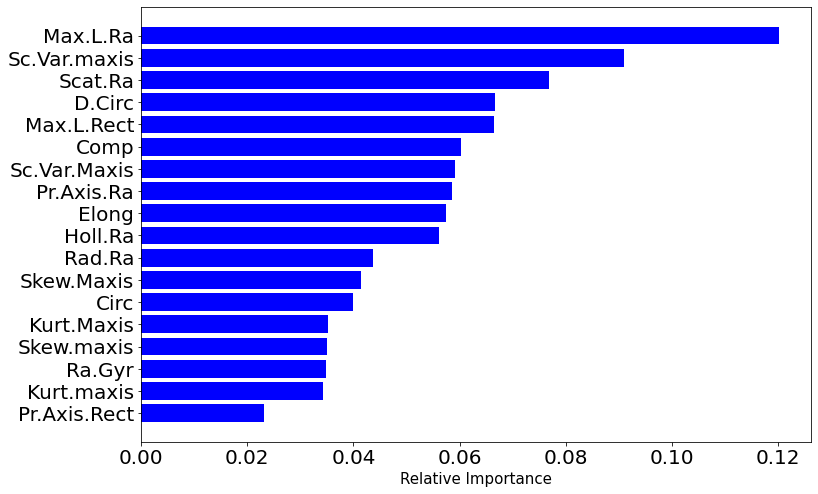

In [12]:
importances = model.feature_importances_
indices = np.argsort(importances)
lmeas_order = []
for i in indices:
    lmeas_order.append(features_names[i])
plt.figure(figsize=(12,8))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), lmeas_order, fontsize=15)
plt.xlabel('Relative Importance',fontsize=15)
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.show()

### Refazendo a questão, mas agora com a separação treino/teste primeiro e só depois a padronização.

In [14]:
import random
random.seed(42) # define the seed (important to reproduce the results)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('data/Vehicle.csv', header=(0))

# remove NaN
data = data.dropna(axis='rows') #
# armazena o nome das classes
classes = np.array(pd.unique(data[data.columns[-1]]), dtype=str)  #name of the clases
features_names = data.columns

data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]
 
from sklearn.model_selection import train_test_split
p = 0.2 # fracao de elementos no conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

# padronizando x_train e ajustando na variável 'scaler'
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)

# notar que os dados de teste são transformados com base na variável 'scaler' ajustada com os dados de treino
x_test = scaler.transform(x_test)

Calculando o melhor número de árvores

Number of Estimators: 1 Accuracy: 0.711764705882353
Number of Estimators: 6 Accuracy: 0.7411764705882353
Number of Estimators: 11 Accuracy: 0.7647058823529411
Number of Estimators: 16 Accuracy: 0.7588235294117647
Number of Estimators: 21 Accuracy: 0.7647058823529411
Number of Estimators: 26 Accuracy: 0.7764705882352941
Number of Estimators: 31 Accuracy: 0.7823529411764706
Number of Estimators: 36 Accuracy: 0.788235294117647
Number of Estimators: 41 Accuracy: 0.7941176470588235
Number of Estimators: 46 Accuracy: 0.7764705882352941
Number of Estimators: 51 Accuracy: 0.788235294117647
Number of Estimators: 56 Accuracy: 0.7764705882352941
Number of Estimators: 61 Accuracy: 0.7764705882352941
Number of Estimators: 66 Accuracy: 0.7823529411764706
Number of Estimators: 71 Accuracy: 0.7823529411764706
Number of Estimators: 76 Accuracy: 0.7764705882352941
Number of Estimators: 81 Accuracy: 0.7705882352941177
Number of Estimators: 86 Accuracy: 0.7647058823529411
Number of Estimators: 91 Accuracy

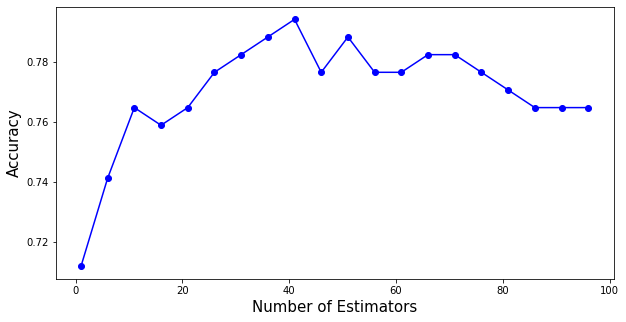

In [16]:
vscore = []
vn = []
for n in range(1,100,5):
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test) 
    score = accuracy_score(y_pred, y_test)
    print('Number of Estimators:', n, 'Accuracy:', score)
    vscore.append(score)
    vn.append(n)
best_n = vn[np.argmax(vscore)]
print('Melhor n:', best_n, ' com acurácia:', vscore[np.argmax(vscore)] )
plt.figure(figsize=(10,5))
plt.plot(vn, vscore, '-bo')
plt.xlabel('Number of Estimators', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.show()

Treinando o modelo com o melhor Number Estimators e fazendo as previsões

In [10]:
from sklearn.ensemble import RandomForestClassifier

# define os parâmetros do modelo
model=RandomForestClassifier(n_estimators=best_n, bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
model.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(x_test)
score = accuracy_score(y_pred, y_test)
print('Accuracy:', score)

Accuracy: 0.8352941176470589


Ordenando os atributos pelo grau de importância

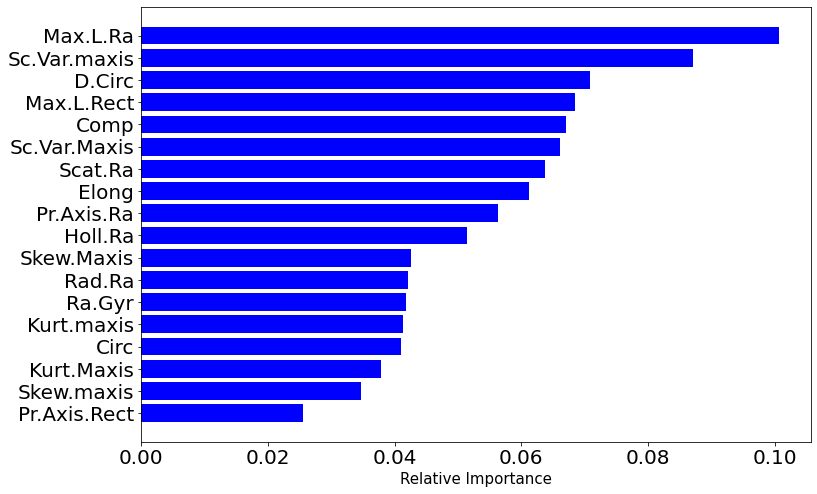

In [17]:
importances = model.feature_importances_
indices = np.argsort(importances)
lmeas_order = []
for i in indices:
    lmeas_order.append(features_names[i])
plt.figure(figsize=(12,8))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), lmeas_order, fontsize=15)
plt.xlabel('Relative Importance',fontsize=15)
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.show()